In [20]:
import sys
sys.path.insert(1, "../../")

import utils
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler

# Deep learning import
import tensorflow as tf

# Evaluation Imports
from sklearn.metrics import mean_squared_error
from math import sqrt

In [21]:
# Disable GPU
# tf.config.set_visible_devices([], 'GPU')

In [22]:
# Configurations
isDemoMode = False
DATA_FILE_NAME = '../../Data/final_crypto_data.csv'
SELECTED_MONTHS = [10,11,12,1,2,3]

In [23]:
print(f"Default number of DF columns displayed {pd.get_option('display.max_columns')}")

# settings to display all columns
pd.set_option("display.max_columns", None)

Default number of DF columns displayed None


In [24]:
df = pd.read_csv (DATA_FILE_NAME)
df = utils.setDateTimeAsIndex(df)
df = utils.filterInMonths(df, SELECTED_MONTHS)
df = df[::15]
df

,Unnamed: 0,_id,high_24h,last_24h,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,open_24h,high_1min,volume_1min,low_1min,close_1min,open_1min,max_supply,circulating_supply,total_supply,quote_USD_price,quote_volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-29 17:09:28,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,62559.74,60908.08,5113.537402,56425.0,62561.13,60608.95,62565.90,1.425169,62539.20,62561.86,62545.45,21000000.0,18858012.0,18858012.0,62556.005047,4.304916e+10,6.0514,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
2021-10-29 17:15:31,15,627127fabbd592fa2c7f25b8,62971.54,62541.28,62531.62,60915.95,5121.220901,56425.0,62550.96,60608.95,62554.21,1.382506,62486.12,62531.42,62513.02,21000000.0,18858012.0,18858012.0,62541.599745,4.311201e+10,6.1111,-0.366133,2.361134,2.388851,26.873643,29.945589,49.972913,1.179410e+12,43.4826,1.313374e+12,0.000834
2021-10-29 17:41:40,30,627127fabbd592fa2c7f25c7,62971.54,62505.02,62496.24,60950.29,5200.503262,56425.0,62502.94,60608.95,62552.18,0.299922,62505.02,62516.47,62552.18,21000000.0,18858012.0,18858012.0,62525.760363,4.288535e+10,4.7327,-0.021597,2.406680,2.941529,26.873643,29.810102,49.972913,1.179112e+12,43.4826,1.313041e+12,0.123475
2021-10-29 17:55:48,45,627127fabbd592fa2c7f25d6,62971.54,62385.18,62384.03,60959.83,5218.017958,56425.0,62399.55,60608.95,62397.39,0.104318,62366.89,62385.18,62397.39,21000000.0,18858012.0,18858012.0,62363.738108,4.286657e+10,4.5434,-0.543703,2.119603,2.870641,26.873643,29.471630,49.972913,1.176056e+12,43.4826,1.309639e+12,0.262691
2021-10-29 18:09:54,60,627127fabbd592fa2c7f25e5,62971.54,62397.10,62394.14,60962.99,5204.297994,56425.0,62404.25,60608.95,62407.86,3.846862,62368.24,62397.57,62385.41,21000000.0,18858012.0,18858012.0,62376.389918,4.263720e+10,4.0919,-0.280623,1.947506,2.811090,26.873643,29.034676,49.972913,1.176295e+12,43.4826,1.309904e+12,0.044513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29 14:03:04,206505,627127ffbbd592fa2c824c52,48234.00,47760.31,47744.40,47676.69,2129.884259,46897.0,47761.11,47152.38,47744.40,0.007683,47744.40,47744.40,47744.40,21000000.0,18997168.0,18997168.0,47688.687392,3.631643e+10,-7.8497,-0.324590,0.068476,11.349490,22.010434,29.295506,0.745302,9.059500e+11,42.0638,1.001462e+12,0.567486
2022-03-29 14:20:16,206520,627127ffbbd592fa2c824c61,48234.00,47708.53,47688.30,47679.37,2090.539455,46897.0,47708.53,47152.38,47708.53,0.002850,47708.53,47708.53,47708.53,21000000.0,18997287.0,18997287.0,47675.442538,3.609768e+10,-9.1578,-0.277283,0.344834,11.117794,22.246273,28.904939,0.746298,9.057041e+11,42.0252,1.001184e+12,0.598674
2022-03-29 14:33:28,206535,627127ffbbd592fa2c824c70,48234.00,47799.42,47789.02,47684.28,2059.912763,46897.0,47815.63,47152.38,47850.25,0.998933,47799.42,47799.42,47850.25,21000000.0,18997287.0,18997287.0,47770.191325,3.597707e+10,-10.3213,-0.050085,0.519339,11.280486,22.528584,29.015888,0.868753,9.075040e+11,42.0490,1.003174e+12,0.411539


In [25]:
len(df)

13772

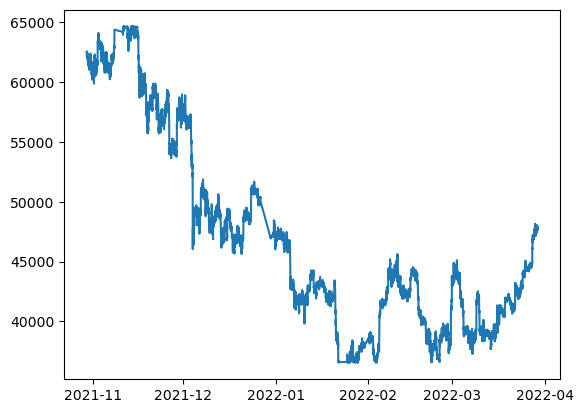

In [26]:
plt.plot(df.index, df['close_1min'] )
plt.show()

In [27]:
test_df = df.tail(round(0.10 * len(df))) if isDemoMode else df

# scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(test_df["close_1min"].values.reshape(-1,1))
scaled_data

array([[0.92534937],
       [0.92426571],
       [0.9237335 ],
       ...,
       [0.39981136],
       [0.40249024],
       [0.4017017 ]])

In [28]:
n_steps = 10
X, y = utils.split_sequence(scaled_data, n_steps)

print(f"Split Dataset X length: {len(X)}")
print(f"Split Dataset y length: {len(y)}")

Split Dataset X length: 13762
Split Dataset y length: 13762


In [29]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X

array([[[0.92534937],
        [0.92426571],
        [0.9237335 ],
        ...,
        [0.91126258],
        [0.90973749],
        [0.90670511]],

       [[0.92426571],
        [0.9237335 ],
        [0.91905962],
        ...,
        [0.90973749],
        [0.90670511],
        [0.90914511]],

       [[0.9237335 ],
        [0.91905962],
        [0.9195007 ],
        ...,
        [0.90670511],
        [0.90914511],
        [0.91564383]],

       ...,

       [[0.4039249 ],
        [0.40623995],
        [0.40761196],
        ...,
        [0.39284308],
        [0.39785267],
        [0.39657571]],

       [[0.40623995],
        [0.40761196],
        [0.40401853],
        ...,
        [0.39785267],
        [0.39657571],
        [0.39981136]],

       [[0.40761196],
        [0.40401853],
        [0.40053795],
        ...,
        [0.39657571],
        [0.39981136],
        [0.40249024]]])

In [30]:
train_X, train_y, valid_X, valid_y, test_X, test_y = utils.train_test_valid_split(
        X,
        y,
        train_size=0.8,
        valid_size=0.1
    )
print("----------------------------")
print(f"-------- Train X: {train_X.shape}, Train y: {train_y.shape} --------")
print(f"-------- Valid X: {valid_X.shape}, Valid y: {valid_y.shape} --------")
print(f"-------- Test X: {test_X.shape}, Test y: {test_y.shape} --------")
print("----------------------------\n")

-------- train test valid split --------
11009
11009
1376
1376
1377
1377
----------------------------------------
----------------------------
-------- Train X: (11009, 10, 1), Train y: (11009, 1) --------
-------- Valid X: (1376, 10, 1), Valid y: (1376, 1) --------
-------- Test X: (1377, 10, 1), Test y: (1377, 1) --------
----------------------------



In [31]:
# define model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(
	64,
	# return_sequences=True,
    # activation='relu',
	# unroll=True,
	input_shape=(train_X.shape[1], train_X.shape[2]),
))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.LSTM(
# 	50,
# 	return_sequences=True,
# ))
# model.add(tf.keras.layers.LSTM(
# 	64
# ))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , loss='mse')

In [32]:
# fit model
history = model.fit(
    X,
    y,
    epochs=150,
    verbose=2,
    batch_size=128,
    validation_data=(valid_X, valid_y),
    shuffle=False,
)

Epoch 1/150


2023-01-09 23:01:05.224503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-09 23:01:05.354058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-09 23:01:05.451977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


108/108 - 2s - loss: 0.0530 - val_loss: 8.5235e-04 - 2s/epoch - 20ms/step
Epoch 2/150


2023-01-09 23:01:06.533953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-09 23:01:06.574898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


108/108 - 1s - loss: 0.0049 - val_loss: 4.1329e-04 - 897ms/epoch - 8ms/step
Epoch 3/150
108/108 - 1s - loss: 0.0027 - val_loss: 1.3408e-04 - 914ms/epoch - 8ms/step
Epoch 4/150
108/108 - 1s - loss: 0.0023 - val_loss: 1.1101e-04 - 903ms/epoch - 8ms/step
Epoch 5/150
108/108 - 1s - loss: 0.0019 - val_loss: 9.8321e-05 - 951ms/epoch - 9ms/step
Epoch 6/150
108/108 - 1s - loss: 0.0018 - val_loss: 9.5364e-05 - 949ms/epoch - 9ms/step
Epoch 7/150
108/108 - 1s - loss: 0.0017 - val_loss: 1.0613e-04 - 986ms/epoch - 9ms/step
Epoch 8/150
108/108 - 1s - loss: 0.0016 - val_loss: 9.7885e-05 - 943ms/epoch - 9ms/step
Epoch 9/150
108/108 - 1s - loss: 0.0016 - val_loss: 8.7965e-05 - 913ms/epoch - 8ms/step
Epoch 10/150
108/108 - 1s - loss: 0.0017 - val_loss: 8.4680e-05 - 890ms/epoch - 8ms/step
Epoch 11/150
108/108 - 1s - loss: 0.0018 - val_loss: 8.1114e-05 - 872ms/epoch - 8ms/step
Epoch 12/150
108/108 - 1s - loss: 0.0017 - val_loss: 8.0664e-05 - 895ms/epoch - 8ms/step
Epoch 13/150
108/108 - 1s - loss: 0.0019 

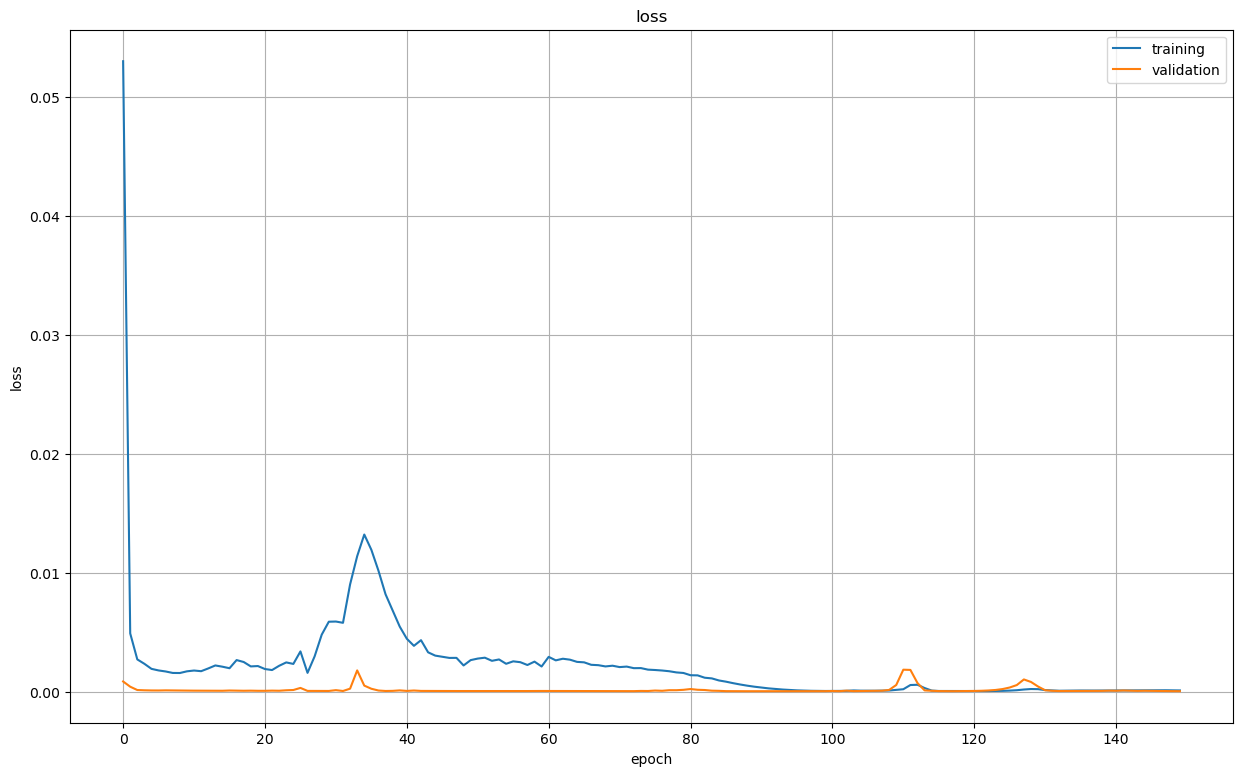

In [33]:
# display training curves
utils.display_training_curves(history.history['loss'], history.history['val_loss'], 'loss')

In [34]:
# make a prediction
y_predict = model.predict(valid_X)

30/43 [===================>..........] - ETA: 0s

2023-01-09 23:03:27.549587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-09 23:03:27.590216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - 0s 4ms/step


In [35]:
# invert scaling for forecast
inv_y_predict = scaler.inverse_transform(y_predict)
# invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
inv_y = scaler.inverse_transform(valid_y)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_y_predict))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 168.261


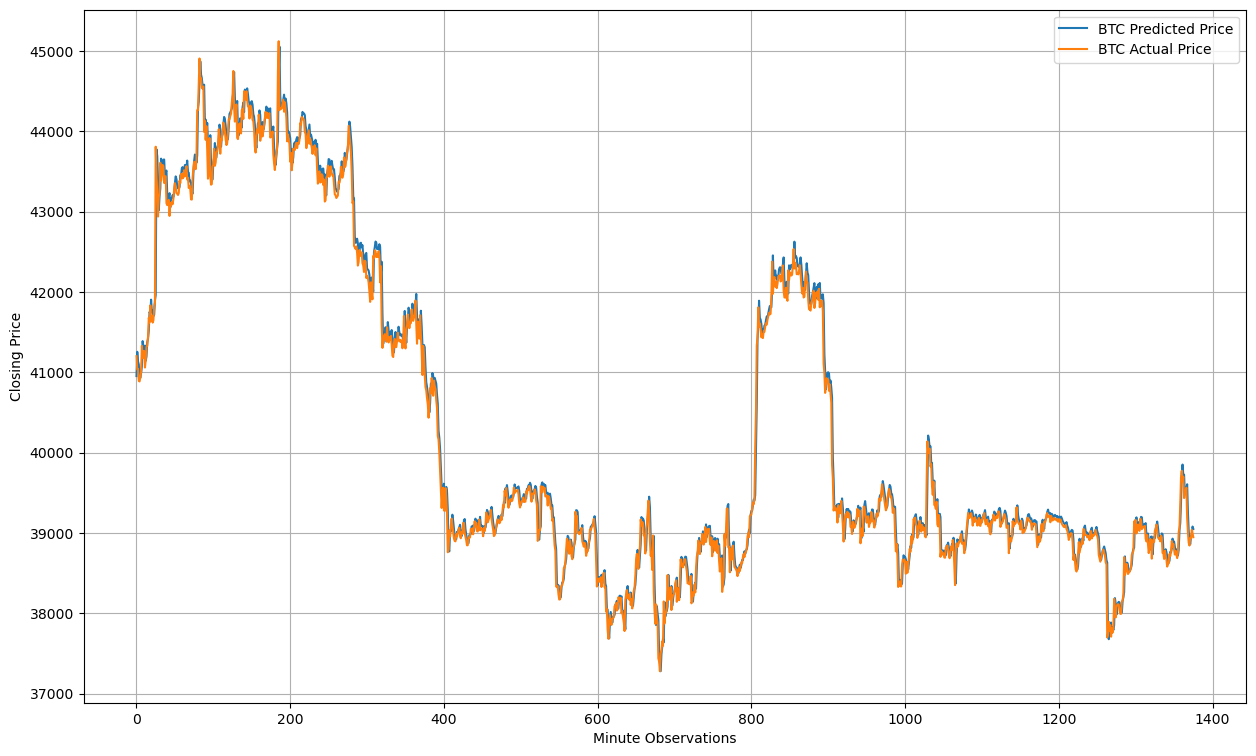

In [36]:
plt.figure(figsize=(15,9))
plt.grid(True)

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(inv_y_predict, label='BTC Predicted Price')
plt.plot(inv_y, label='BTC Actual Price')
plt.legend()

In [38]:
# make a prediction
y_test_predict = model.predict(test_X)

44/44 [==============================] - 2s 35ms/step


In [39]:
# invert scaling for forecast
inv_y_test_predict = scaler.inverse_transform(y_test_predict)
# invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
inv_test_y = scaler.inverse_transform(test_y)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_test_y, inv_y_test_predict))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 177.040


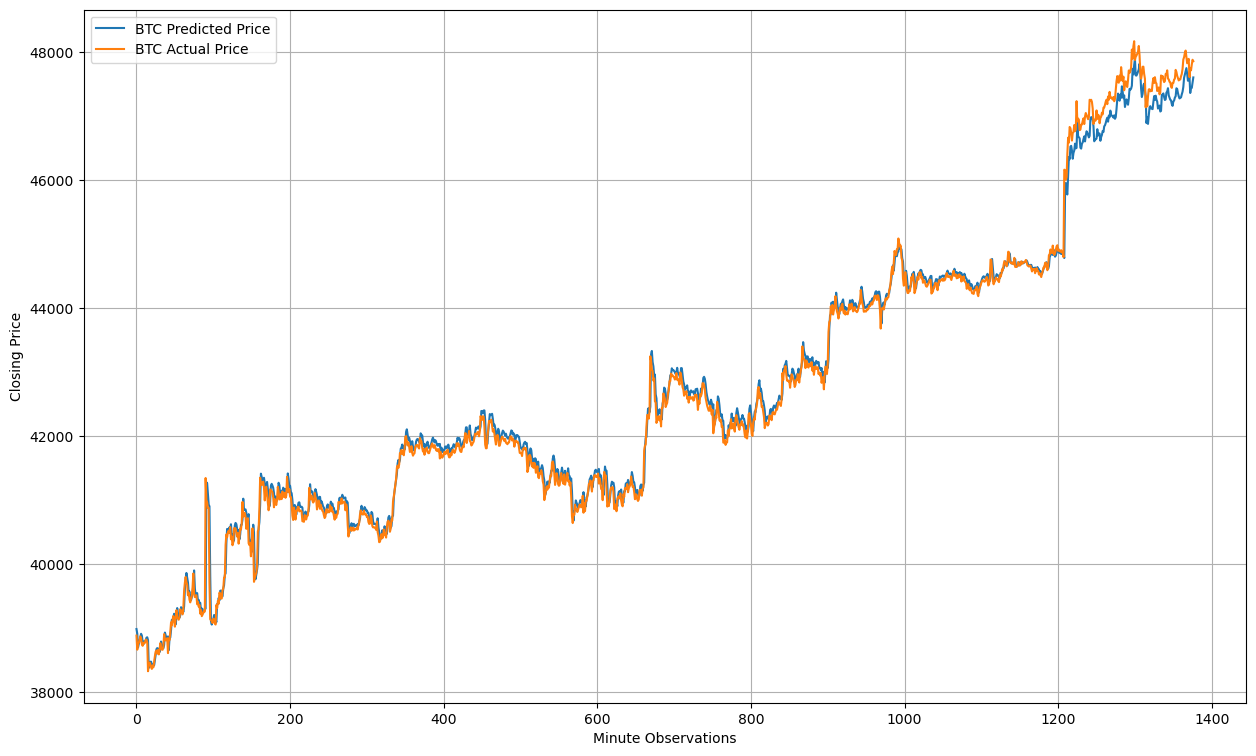

In [40]:
plt.figure(figsize=(15,9))
plt.grid(True)

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(inv_y_test_predict, label='BTC Predicted Price')
plt.plot(inv_test_y, label='BTC Actual Price')
plt.legend()